In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
# Define paths to your dataset
train_data_dir = '/content/drive/MyDrive/google collllab/Segment Dataset/seg_train'
test_data_dir = '/content/drive/MyDrive/google collllab/Segment Dataset/seg_test'

In [15]:
# Image dimensions
img_width, img_height = 150, 150

In [16]:
# Image augmentation
datagen = ImageDataGenerator(rescale=1. / 255, validation_split=0.2)

In [17]:
train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=64,  # Increased batch size for potential speedup
    class_mode='categorical',
    subset='training'  # Use subset parameter to specify training split
)

test_generator = datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=64,
    class_mode='categorical',
)

Found 4842 images belonging to 6 classes.
Found 1206 images belonging to 6 classes.


In [18]:
# Print out the number of classes found
num_classes = len(train_generator.class_indices)
print("Number of classes:", num_classes)

Number of classes: 6


In [19]:
# Model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [20]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [25]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=2,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)

Epoch 1/2
75/75 [==============================] - 307s 4s/step - loss: 0.1908 - accuracy: 0.9343 - val_loss: 0.8805 - val_accuracy: 0.7639
Epoch 2/2
75/75 [==============================] - 286s 4s/step - loss: 0.1460 - accuracy: 0.9550 - val_loss: 0.8534 - val_accuracy: 0.7891


In [26]:
# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print("Test Accuracy:", accuracy)

19/19 [==============================] - 24s 1s/step - loss: 0.8381 - accuracy: 0.7927
Test Accuracy: 0.7927031517028809


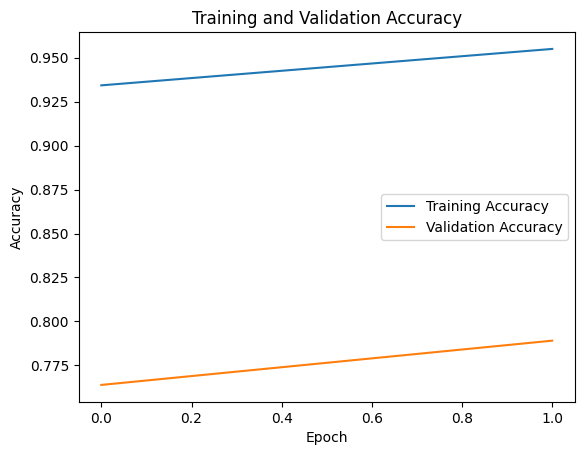

In [27]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


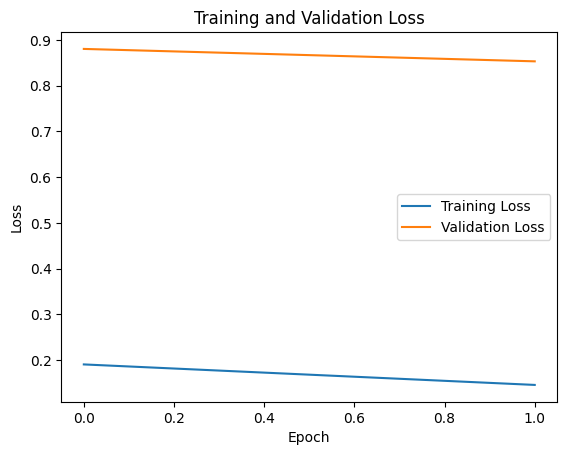

In [28]:
# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [30]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Path to your single image
image_path = '/content/drive/MyDrive/google collllab/Segment Dataset/seg_train/mountain/1019.jpg'

# Load and preprocess the image
img = image.load_img(image_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img) / 255.
img_array = np.expand_dims(img_array, axis=0)

# Make prediction
predicted_class = np.argmax(model.predict(img_array))

# Get the class label
predicted_label = list(train_generator.class_indices.keys())[predicted_class]

print("Predicted class:", predicted_label)


1/1 [==============================] - 0s 153ms/step
Predicted class: mountain
